In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Percentage of Gene Records with collisions per source

In [24]:
#from 1_alias_primary_collision_analysis: xxxx_alias_primary_collision_primary_symbol_set
#HGNC, ENSG, NCBI
raw_counts_ap = [637,674,1728]

In [25]:
#from 1_alias_primary_collision_analysis: xxxx_alias_primary_collision_primary_symbol_set/total_number_xxxx_gene_symbols
#currently using gene symbols, need to use gene records (IDs)
hgnc_percent_records_with_ap_collision = (raw_counts_ap[1]/45646)*100
ensg_percent_records_with_ap_collision = (raw_counts_ap[2]/41164)*100
ncbi_percent_records_with_ap_collision = (raw_counts_ap[3]/45727)*100

In [26]:
#from 3_alias_alias_collision_distribution_analysis: xxxx_aa_collision_primary_symbol_count
#HGNC, ENSG, NCBI
raw_counts_aa = [3113,2530,6013]

In [27]:
#from 3_alias_alias_collision_distribution_analysis: xxxx_aa_collision_primary_symbol_count/xxxx_gene_symbol_count
#currently using gene symbols, need to use gene records (IDs)
hgnc_percent_records_with_aa_collision = (3113/45646)*100
ensg_percent_records_with_aa_collision = (2530/41067)*100
ncbi_percent_records_with_aa_collision = (6013/45390)*100

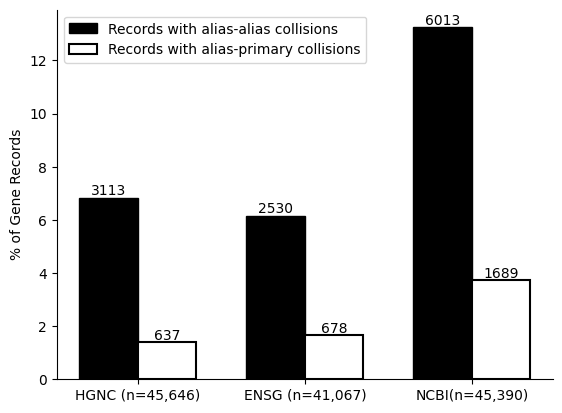

In [48]:
databases = ['HGNC (n=45,646)', 'ENSG (n=41,067)', 'NCBI(n=45,390)']
percent_records_with_aa_collision = [hgnc_percent_records_with_aa_collision, ensg_percent_records_with_aa_collision, ncbi_percent_records_with_aa_collision]
percent_records_with_ap_collision = [hgnc_percent_records_with_ap_collision, ensg_percent_records_with_ap_collision, ncbi_percent_records_with_ap_collision] 

x = np.arange(len(databases))

# Width of the bars
width = 0.35

# Plotting the bars
fig, ax = plt.subplots()

bar1 = ax.bar(x - width/2, percent_records_with_aa_collision, width, label='Records with alias-alias collisions',
              color='black', edgecolor='black')

# bar2: all white fill with black edge
bar2 = ax.bar(x + width/2, percent_records_with_ap_collision, width, label='Records with alias-primary collisions',
              color='white', edgecolor='black', linewidth=1.5)

# Add raw count labels on bar1
for rect, count in zip(bar1, raw_counts_aa):
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), f'{count}', ha='center', va='bottom')

# Add raw count labels on bar2
for rect, count in zip(bar2, raw_counts_ap):
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), f'{count}', ha='center', va='bottom')

# Labels and title
ax.set_ylabel(f'% of Gene Records')
ax.set_xticks(x)
ax.set_xticklabels(databases)
ax.legend(loc='upper left')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


# Number of Ambiguous Symbols due to collisions per source

In [50]:
#from 7_ambiguous_symbol_distribution_analysis:xxx_ambiguous_symbol_set, only_aa_collision_alias_xxxx_set, only_ap_collision_alias_xxxx_set, both_collision_xxxx_set
hgnc_num_amb_symbols_from_aa_collisions = 1182
ensg_num_amb_symbols_from_aa_collisions = 1558
ncbi_num_amb_symbols_from_aa_collisions = 3437

hgnc_num_amb_symbols_from_both_collisions = 68
ensg_num_amb_symbols_from_both_collisions = 59
ncbi_num_amb_symbols_from_both_collisions = 236

hgnc_num_amb_symbols_from_ap_collisions = 508
ensg_num_amb_symbols_from_ap_collisions = 562
ncbi_num_amb_symbols_from_ap_collisions = 1330

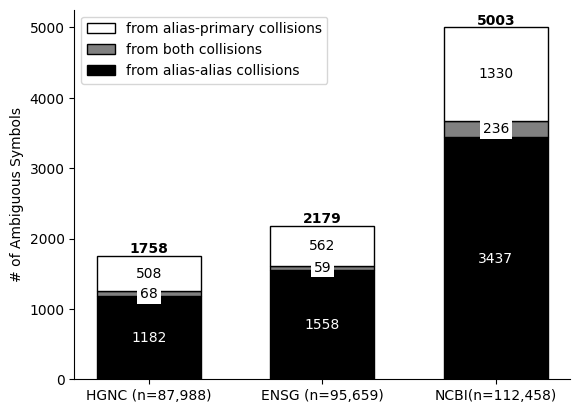

In [54]:
databases = ['HGNC (n=87,988)', 'ENSG (n=95,659)', 'NCBI(n=112,458)']
num_amb_symbols_from_aa_collisions = [hgnc_num_amb_symbols_from_aa_collisions, ensg_num_amb_symbols_from_aa_collisions, ncbi_num_amb_symbols_from_aa_collisions]
num_amb_symbols_from_both_collisions = [hgnc_num_amb_symbols_from_both_collisions, ensg_num_amb_symbols_from_both_collisions, ncbi_num_amb_symbols_from_both_collisions]
num_amb_symbols_from_ap_collisions = [hgnc_num_amb_symbols_from_ap_collisions, ensg_num_amb_symbols_from_ap_collisions, ncbi_num_amb_symbols_from_ap_collisions]

x = np.arange(len(databases))
width = 0.6

fig, ax = plt.subplots()

# Use black, gray, white colors
bar1 = ax.bar(x, num_amb_symbols_from_aa_collisions, width, label='from alias-alias collisions', color='black', edgecolor='black')
bar2 = ax.bar(x, num_amb_symbols_from_both_collisions, width, bottom=num_amb_symbols_from_aa_collisions, label='from both collisions', color='gray', edgecolor='black')
bottom_1_2 = np.array(num_amb_symbols_from_aa_collisions) + np.array(num_amb_symbols_from_both_collisions)
bar3 = ax.bar(x, num_amb_symbols_from_ap_collisions, width, bottom=bottom_1_2, label='from alias-primary collisions', color='white', edgecolor='black')

def add_labels(bars, bottoms, values, text_color):
    for rect, bottom, value in zip(bars, bottoms, values):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2,
            bottom + height / 2,
            str(value),
            ha='center', va='center',
            fontsize=10,
            color=text_color,
        )
def add_labels_with_box(bars, bottoms, values, text_color):
    for rect, bottom, value in zip(bars, bottoms, values):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2,
            bottom + height / 2,
            str(value),
            ha='center', va='center',
            fontsize=10,
            color=text_color,
            bbox=dict(facecolor='white', edgecolor='none', boxstyle='square,pad=0.2')
        )

# Add labels with color matching the background color for contrast
add_labels(bar1, np.zeros(len(num_amb_symbols_from_aa_collisions)), num_amb_symbols_from_aa_collisions, 'white')  # white text on black
add_labels_with_box(bar2, num_amb_symbols_from_aa_collisions, num_amb_symbols_from_both_collisions, 'black')                # black text on gray
add_labels(bar3, bottom_1_2, num_amb_symbols_from_ap_collisions, 'black')              # black text on white

totals = np.array(num_amb_symbols_from_aa_collisions) + np.array(num_amb_symbols_from_both_collisions) + np.array(num_amb_symbols_from_ap_collisions)

for i, total in enumerate(totals):
    ax.text(
        x[i],                 # x position (center of the bar)
        total + 0.5,          # y position (just above the bar)
        str(total),           # label text
        ha='center', va='bottom',
        fontsize=10,
        fontweight='bold'
    )

ax.set_ylabel(f'# of Ambiguous Symbols')
ax.set_xticks(x)
ax.set_xticklabels(databases)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='upper left')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()
